Импортируем библиотеки

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import cv2
import os
from sklearn.model_selection import train_test_split
import json

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchvision.models import resnet50, ResNet50_Weights

from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

from math import sin, cos

C:\Users\Anton\anaconda3\envs\envpytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import torchvision.models as models
# resnet18 = models.resnet18(pretrained=True)
# alexnet = models.alexnet(pretrained=True)
# squeezenet = models.squeezenet1_0(pretrained=True)
# vgg16 = models.vgg16(pretrained=True)
# densenet = models.densenet161(pretrained=True)
# inception = models.inception_v3(pretrained=True)
# googlenet = models.googlenet(pretrained=True)
# shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
# mobilenet = models.mobilenet_v2(pretrained=True)
# resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
# wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
# mnasnet = models.mnasnet1_0(pretrained=True)

Создаем таблицу с лейблами для тренировочного датасета

In [3]:
json_dir = r"C:/onechki/mipt_aerial_photo/train_dataset_train/train/json/"


data_df = pd.DataFrame({"id": [], 
                        "left_top_x": [], "left_top_y": [],
                        "right_top_x": [], "right_top_y": [],
                        "left_bottom_x": [], "left_bottom_y": [],
                        "right_bottom_x": [], "right_bottom_y": [],
                        "angle": []})

json_true = []
for _, _, files in os.walk(json_dir):
    for x in files:
        if x.endswith(".json"):
            data = json.load(open(json_dir + x))
            new_row = {"id": x.split(".")[0]+".png", 
                       "left_top_x":data["left_top"][0], "left_top_y":data["left_top"][1],
                       "right_top_x":data["right_top"][0], "right_top_y":data["right_top"][1],
                       "left_bottom_x": data["left_bottom"][0], "left_bottom_y": data["left_bottom"][1],
                       "right_bottom_x": data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1],
                       "angle": data["angle"]}
            data_df = data_df.append(new_row, ignore_index=True)
#             data_df = data_df.concat(new_row, axis=0)
data_df.head(5)

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\Anton\AppData\Local\Temp\ipykernel_1388\4204605024.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row,

,id,left_top_x,left_top_y,right_top_x,right_top_y,left_bottom_x,left_bottom_y,right_bottom_x,right_bottom_y,angle
0,1.png,8533.0,2184.0,9501.0,1851.0,8866.0,3152.0,9834.0,2819.0,341.0
1,100.png,7078.0,4789.0,6662.0,3854.0,8013.0,4373.0,7597.0,3438.0,246.0
2,1000.png,6291.0,8856.0,6908.0,9674.0,5473.0,9473.0,6090.0,10291.0,53.0
3,1003.png,5970.0,7996.0,5131.0,7408.0,6558.0,7157.0,5719.0,6569.0,215.0
4,1004.png,4953.0,8885.0,5975.0,8814.0,5024.0,9907.0,6046.0,9836.0,356.0


Создаем класс для генерации датасета, элемент которого представляет набор из трансформированного изображения и лейблов (координат углов и угла поворота)

In [4]:
# class ImageDataset_(Dataset):
#     def __init__(self, data_df, transform=None):

#         self.data_df = data_df
#         self.transform = transform

#     def __getitem__(self, idx):
#         # достаем имя изображения и его лейбл
#         image_name, labels = self.data_df.iloc[idx]['id'], [self.data_df.iloc[idx]['left_top_x']/10496, 
#                                                             self.data_df.iloc[idx]['left_top_y']/10496, 
#                                                             self.data_df.iloc[idx]['right_bottom_x']/10496, 
#                                                             self.data_df.iloc[idx]['right_bottom_y']/10496, 
#                                                             self.data_df.iloc[idx]['angle']]

#         # читаем картинку. read the image
#         image = cv2.imread(f"C:/onechki/mipt_aerial_photo/train_dataset_train/train/img/{image_name}")
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = Image.fromarray(image)
        
#         # преобразуем, если нужно. transform it, if necessary
#         if self.transform:
#             image = self.transform(image)
        
#         return image, torch.tensor(labels).float()
    
#     def __len__(self):
#         return len(self.data_df)

In [5]:
class Patcher(Dataset):
    def __init__(self, path, transform, base_size, seed=42):
        super().__init__()
        self.transform = transform
        self.imgs = []
        for img_name in os.listdir(path):
            self.imgs.append(Image.open(path + img_name).resize((base_size // 4, base_size // 4)))
        self.rng = np.random.RandomState(seed)

    def crop(self, img, center_x, center_y, size):
        left = center_x - size / 2
        top = center_y - size / 2
        right = center_x + size / 2
        bottom = center_y + size / 2
        return img.crop((left, top, right, bottom))

    def __getitem__(self, indx):
        img = self.imgs[self.rng.randint(0, len(self.imgs))]
        x_center = self.rng.randint(512, base_size - 512)
        y_center = self.rng.randint(512, base_size - 512)
        angle = self.rng.randint(0, 360)

        cropped = self.crop(img, x_center // 4, y_center // 4, 1024 * 3 // 2// 4)
        rotated = cropped.rotate(angle)
        fixed_size = self.crop(rotated, 1024 * 3 // 4// 4, 1024 * 3 // 4// 4, 1024// 4)
        return self.transform(fixed_size), torch.tensor(np.array(
            [x_center / base_size, y_center / base_size, angle / 360])).float()

    def __len__(self):
        return 10000


class ImageDataset(Dataset):
    def __init__(self, df, path, transform):
        super().__init__()
        self.transform = transform
        self.imgs = []
        for name in tqdm(df['id'].values):
            self.imgs.append(self.transform(Image.open(f'{path}{name}').resize((1024 // 4, 1024 // 4))))
        xs = ['left_top_x', 'right_top_x', 'right_bottom_x', 'left_bottom_x']
        ys = ['left_top_y', 'right_top_y', 'right_bottom_y', 'left_bottom_y']
        self.x_centers = (df[xs].max(axis=1) + df[xs].min(axis=1)) / 2 / base_size
        self.y_centers = (df[ys].max(axis=1) + df[ys].min(axis=1)) / 2 / base_size
        self.angles = df['angle'].values

    def __getitem__(self, indx):
        return self.imgs[indx], torch.tensor(np.array([self.x_centers[indx], self.y_centers[indx], self.angles[indx] / 360])).float()

    def __len__(self):
        return len(self.imgs)

Задаем трансформации. Мы не можем менять геометрию изображений, поэтому не будем добавлять различные афинные преобразования. Но мы можем немного менять контраст изображения и размывать его блюром. Зачем? Предполагаю, что это может немного сымитировать дымчатые снимки (со слабой облачностью). 

Для моделей, которые уже есть внутри Pytorch, размер изображений должен быть не менее 224 по одной из сторон, а также они должны были нормированы определенным образом. Эти значения приведены на сайте Pytorch. Несмотря на то, что патчи изначально немаленькие (со стороной 1024), визуальный анализ показывает, что уменьшение их в 4 раза (до 256) не приводит к потере значимой информации.

In [6]:
train_transform = transforms.Compose([
    # where H and W are expected to be at least 224.
    transforms.ToTensor(),
    transforms.Resize(256),
#     transforms.RandomResizedCrop(224),
    transforms.RandomAutocontrast(p=0.3),
    transforms.GaussianBlur(kernel_size=(3,3), sigma=(0.01, 2.0)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225]),
])

valid_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
#     transforms.RandomResizedCrop(224), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225]),
])

Для обучения тренировочный датасет также можно разделить на тренировочный и валидационный, чтобы в ходе обучения смотреть на результаты работы модели по второму набору. Определим его долю как 20 %.

In [7]:
# train_df, valid_df = train_test_split(data_df, test_size=0.2, random_state=43)

In [8]:
base_size = 10496
base_path = r"C:/onechki/mipt_aerial_photo/train_dataset_train/bigs/"
img_dir = r"C:/onechki/mipt_aerial_photo/train_dataset_train/train/img/"

In [9]:
train_dataset = Patcher(base_path, train_transform, base_size)
valid_dataset = ImageDataset(data_df, img_dir, valid_transform)

C:\Users\Anton\anaconda3\envs\envpytorch\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (110166016 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:19<00:00, 42.03it/s]


In [10]:
# train_dataset = ImageDataset(train_df, train_transform)
# valid_dataset = ImageDataset(valid_df, valid_transform)

In [11]:
len(train_dataset)

10000

In [12]:
# train_df.shape, valid_df.shape

In [13]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=25,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=25,
                          shuffle=False)

In [14]:
# images, labels = iter(train_loader).next()

In [15]:
# labels.size()

Функция расчета метрики из условий конкурса.

In [16]:
# def compute_metric(data_true, data_pred, outImageW = base_size, outImageH = base_size):

#     x_center_true = np.array((data_true[0] + data_true[2])/2).astype(int)
#     y_center_true = np.array((data_true[1] + data_true[3])/2).astype(int)

#     x_metr = x_center_true - np.array((data_pred[0] + data_pred[2])/2).astype(int)
#     y_metr = y_center_true - np.array((data_pred[1] + data_pred[3])/2).astype(int)

#     metr =  1 - 0.7 * (abs(x_metr)/outImageH + abs(y_metr)/outImageW)/2 + 0.3 *abs(data_pred[4] - data_true[4])/359
#     return metr

In [17]:
def my_loss(output, target):
    pos_err = (torch.abs(target[:,0] - output[:,0]) + torch.abs(target[:,1] - output[:,1])) / 2
    ang_diff = torch.abs(target[:,2] - output[:,2])
    ang_err = torch.minimum(ang_diff, 1 - ang_diff)

    loss = torch.mean(0.7 * pos_err + 0.3 * ang_err)
    return loss

Функция построения графика обучения

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='x', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

Функция обучения

In [20]:
def train(model, criterion, optimizer, train_loader, val_loader, compute_metric, epochs=50):
    train_loss_log = []
    val_loss_log = []
    
    train_acc_log = []
    val_acc_log = []
    
    for epoch in tqdm(range(epochs)):
        
        model.train()
        
        train_loss = 0
        train_size = 0
        
        train_pred = []

        for imgs, labels in train_loader:
            optimizer.zero_grad()

            imgs = imgs.to(device)
#             print('imgs', imgs.type())
            labels = labels.to(device)
#             print('labels', labels.type())

            outputs = model(imgs)
#             print('outputs', outputs.type())

            loss = criterion(outputs, labels)
            loss.backward()
            
            train_loss += loss.item()
            train_size += outputs.size(0)
#             train_loss_log.append((loss.data.cpu().detach().numpy() / outputs.size(0)) * 100)
            train_loss_log.append(loss.data.cpu().detach().numpy())
            
#             outputs[:, :4] = outputs[:, :4] * 10496
#             outputs[:, -1] = outputs[:, -1] * 360

#             labels[:, :4] = labels[:, :4] * 10496
#             labels[:, -1] = labels[:, -1] * 360

#             for label, pr in zip(labels, outputs):
#                     train_pred.append(compute_metric(label.cpu().detach().numpy(), pr.cpu().detach().numpy()))

            train_pred.append(compute_metric(labels.cpu(), outputs.cpu()))
            
            optimizer.step()

        train_acc_log.append(train_pred)

        val_loss = 0
        val_size = 0
        
        val_pred = []
        
        model.eval()
        
        with torch.no_grad():
            for imgs, labels in val_loader:
                
                imgs = imgs.to(device)
                labels = labels.to(device)
                
                pred = model(imgs)
                loss = criterion(pred, labels)

#                 pred[:, :4] = pred[:, :4] * 10496
#                 pred[:, -1] = pred[:, -1] * 360

#                 labels[:, :4] = labels[:, :4] * 10496
#                 labels[:, -1] = labels[:, -1] * 360
                
                val_loss += loss.item()
                val_size += pred.size(0)

#                 for pr, label in zip(pred, labels):
#                     val_pred.append(compute_metric(pr.cpu().detach().numpy(), label.cpu().detach().numpy()))
                
                val_pred.append(compute_metric(labels.cpu(), pred.cpu()))

#         val_loss_log.append((val_loss / val_size)*100)
        val_loss_log.append(val_loss)
        val_acc_log.append(val_pred)

        clear_output()
        plot_history(train_loss_log, val_loss_log, 'loss')

#         print('Train loss:', (train_loss / train_size)*100)
#         print('Val loss:', (val_loss / val_size)*100)
        print('Train loss:', train_loss / len(train_loader))
        print('Val loss:', val_loss / len(val_loader))
#         print('Train metric:', (np.mean(np.array(train_pred))))
#         print('Val metric:', (np.mean(np.array(val_pred))))
        
    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

In [21]:
print(torch.cuda.is_available())

True


In [22]:
torch.cuda.empty_cache()

# Подргружаем модель

# model = models.resnet50(pretrained=True)
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
# model.fc = nn.Linear(2048, 3)
model.fc = torch.nn.Sequential(torch.nn.Linear(2048, 3), torch.nn.Sigmoid())

model = model.to(device)
# criterion = torch.nn.MSELoss()
# criterion = my_loss

optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

Обучение

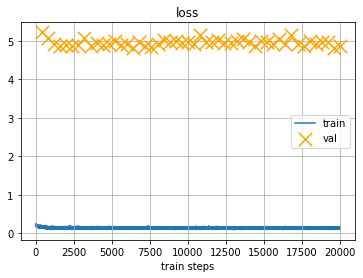

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [1:16:34<00:00, 91.89s/it]

Train loss: 0.13337078500539065
Val loss: 0.15202479413710535


In [23]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
#                                                                  criterion,
                                                                 my_loss,
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 valid_loader,
                                                                 my_loss,
                                                                 50)

In [24]:
train_size = int(0.9 * len(valid_dataset))
test_size = len(valid_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(valid_dataset, [train_size, test_size])

In [25]:
tr_loader = DataLoader(dataset=train_set,
                          batch_size=25,
                          shuffle=True)

val_loader = DataLoader(dataset=val_set,
                          batch_size=25,
                          shuffle=False)

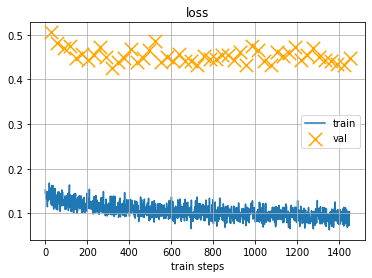

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:53<00:00,  4.66s/it]

Train loss: 0.09079568396354544
Val loss: 0.11218643933534622


In [26]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 my_loss, 
                                                                 optimizer, 
                                                                 tr_loader, 
                                                                 val_loader,
                                                                 my_loss,
                                                                 50)

In [27]:
test_images_dir = 'C:/onechki/mipt_aerial_photo/test_dataset_test/'
f_names = os.listdir(test_images_dir)

sub_dir = r"C:/onechki/mipt_aerial_photo/submission_6/"
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

model.eval()

for name in f_names:
    with open(f'{sub_dir}{name[:-4]}.json', 'w') as f:
        img = valid_transform(Image.open(f'{test_images_dir}{name}').resize((1024 // 4, 1024 // 4)))
        res = model(img.to(device).unsqueeze(0))
        res = res.cpu().detach().numpy()[0]
        res_coords = res[:2] * base_size
        res_ang = res[2] * 360
        const_pred = {"left_top": [round(res_coords[0]), round(res_coords[1])], 
                      "right_top": [round(res_coords[0]), round(res_coords[1])],
                      "left_bottom": [round(res_coords[0]), round(res_coords[1])], 
                      "right_bottom": [round(res_coords[0]), round(res_coords[1])],
                      "angle": round(res_ang)}
        json.dump(const_pred, f)

Первый сабмит - всё без изменений, размер батча 4

второй - добавлен кроп, батч 16

третий - в трансформс добавлены еще штучки-дрючки

четвертый - микс двух кодов, mse as loss, обучение на больших, дообучение на трейне

пятый - то же, но май лосс

Создадим класс для генерации тестового датасета. От предыдущего отличается отсутствием лейблов

In [43]:
# class TestImageDataset_(Dataset):
#     def __init__(self, files, transform=None):

#         self.files = files
#         self.transform = transform

#     def __getitem__(self, idx):

#         image_name = self.files[idx]

#         # читаем картинку. read the image
#         image = cv2.imread(f"C:/onechki/mipt_aerial_photo/test_dataset_test/{image_name}")
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = Image.fromarray(image)
        
#         # преобразуем, если нужно. transform it, if necessary
#         if self.transform:
#             image = self.transform(image)
        
#         return image
    
#     def __len__(self):
#         return len(self.files)

In [ ]:
# class TestImageDataset(Dataset):
#     def __init__(self, path, transform):
#         super().__init__()
#         self.transform = transform
#         self.imgs = []
#         for name in tqdm(df['id'].values):
#             self.imgs.append(self.transform(Image.open(f'{path}{name}').resize((1024 // 4, 1024 // 4))))

#     def __getitem__(self, indx):
#         return self.imgs[indx]

#     def __len__(self):
#         return len(self.imgs)

Создадим его

In [44]:
# test_images_dir = 'C:/onechki/mipt_aerial_photo/test_dataset_test/'

# # for _, _, test_files in os.walk(test_images_dir):
# #     break

# test_dataset = TestImageDataset(test_images_dir, valid_transform)

# test_loader = DataLoader(dataset=test_dataset,
#                         batch_size=1)

надо взять несколько и медиану

Предскажем ответы

In [45]:
# indexes = [x.split('.')[0] for x in test_files]
# preds = []

# model.eval()

# for imgs in test_loader:
#     imgs = imgs.to(device)            
#     pred = model(imgs)
#     pred = pred.cpu().detach().numpy()
#     pred[:, :4] = np.clip(pred[:, :4] * 10496, 0, 10496)
#     pred[:, -1] = np.clip(pred[:, -1] * 360, 0, 360)
#     preds.extend(list(pred))

Выгрузим их в файлы json

In [46]:
# sub_dir = r"C:/onechki/mipt_aerial_photo/submission_4/"
# if not os.path.exists(sub_dir):
#     os.makedirs(sub_dir)

# # json_true = []

# for indx, pred in zip(indexes, preds):

#     pred = [int(x) for x in pred]

#     left_top = [pred[0], pred[1]]
#     right_top = [pred[2], pred[1]]
#     left_bottom = [pred[0], pred[3]]
#     right_bottom = [pred[2], pred[3]]
        
#     res = {
#         'left_top': left_top,
#         'right_top': right_top,
#         'left_bottom': left_bottom,
#         'right_bottom': right_bottom,
#         'angle': pred[4]
#     }

#     with open(sub_dir+indx+'.json', 'w') as f:
#         json.dump(res, f)

Ниже код несчастного скатывальщика. Как и выше

In [ ]:
class Patcher(Dataset):
    def __init__(self, path, transform, base_size, seed=42):
        super().__init__()
        self.transform = transform
        self.imgs = []
        for img_name in os.listdir(path):
            self.imgs.append(Image.open(path + img_name).resize((base_size // 4, base_size // 4)))
        self.rng = np.random.RandomState(seed)

    def crop(self, img, center_x, center_y, size):
        left = center_x - size / 2
        top = center_y - size / 2
        right = center_x + size / 2
        bottom = center_y + size / 2
        return img.crop((left, top, right, bottom))

    def __getitem__(self, indx):
        img = self.imgs[self.rng.randint(0, len(self.imgs))]
        x_center = self.rng.randint(512, base_size - 512)
        y_center = self.rng.randint(512, base_size - 512)
        angle = self.rng.randint(0, 360)

        cropped = self.crop(img, x_center // 4, y_center // 4, 1024 * 3 // 2// 4)
        rotated = cropped.rotate(angle)
        fixed_size = self.crop(rotated, 1024 * 3 // 4// 4, 1024 * 3 // 4// 4, 1024// 4)
        return self.transform(fixed_size), np.array([x_center / base_size, y_center / base_size, angle / 360])

    def __len__(self):
        return 10000


class Loader(Dataset):
    def __init__(self, df, path, transform):
        super().__init__()
        self.transform = transform
        self.imgs = []
        for name in tqdm(df['id'].values):
            self.imgs.append(self.transform(Image.open(f'{path}{name}').resize((1024 // 4, 1024 // 4))))
        xs = ['left_top_x', 'right_top_x', 'right_bottom_x', 'left_bottom_x']
        ys = ['left_top_y', 'right_top_y', 'right_bottom_y', 'left_bottom_y']
        self.x_centers = (df[xs].max(axis=1) + df[xs].min(axis=1)) / 2 / base_size
        self.y_centers = (df[ys].max(axis=1) + df[ys].min(axis=1)) / 2 / base_size
        self.angles = df['angle'].values

    def __getitem__(self, indx):
        return self.imgs[indx], np.array([self.x_centers[indx], self.y_centers[indx], self.angles[indx] / 360])

    def __len__(self):
        return len(self.imgs)

In [4]:
base_size=10496
path = r"C:/onechki/mipt_aerial_photo/train_dataset_train/bigs/"
imgs = []
for img_name in os.listdir(path):
    imgs.append(Image.open(path + img_name).resize((base_size // 4, base_size // 4)))
    rng = np.random.RandomState(42)

In [8]:
def crop(img, center_x, center_y, size):
    left = center_x - size / 2
    top = center_y - size / 2
    right = center_x + size / 2
    bottom = center_y + size / 2
    return img.crop((left, top, right, bottom))

In [10]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256),
#     transforms.RandomResizedCrop(224), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225]),
])

In [ ]:
patcher = Patcher(base_path, transform, base_size=10496)
loader = Loader(data_df, img_dir, transform)

In [ ]:
for im, coo in patcher:
    print(coo)
    plt.imshow(torch.swapaxes(im, 0, 2))
    break

In [ ]:
for im, coo in loader:
    print(coo)
    plt.imshow(torch.swapaxes(im, 0, 2))
    plt.show()
    break

In [ ]:
gc.collect()

In [ ]:
train_loader = DataLoader(patcher, batch_size=100, shuffle=False)
val_loader = DataLoader(loader, batch_size=100, shuffle=False)

In [ ]:
model = mobilenet_v2(width_mult=0.35)

In [ ]:
model.features[-1] = torch.nn.ReLU6(inplace=True)
model.classifier = torch.nn.Sequential(torch.nn.Linear(112, 3), torch.nn.Sigmoid())
model.to(device)

In [ ]:
def my_loss(output, target):
    pos_err = (torch.abs(target[:,0] - output[:,0]) + torch.abs(target[:,1] - output[:,1])) / 2
    ang_diff = torch.abs(target[:,2] - output[:,2])
    ang_err = torch.minimum(ang_diff, 1 - ang_diff)

    loss = torch.mean(0.7 * pos_err + 0.3 * ang_err)
    return loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#train

In [ ]:
# x_p = np.round(np.median(centers_x))
# y_p = np.round(np.median(centers_y))
# s_p = np.median(np.sin(angles))
# c_p = np.median(np.cos(angles))
# a_p = np.round(np.arctan2(s_p, c_p) * 180 / np.pi)
# if a_p < 0: a_p += 360
# print(x_p, y_p, a_p, np.median(angles))

In [ ]:
# pos_err = (np.abs(centers_x - x_p) + np.abs(centers_y - y_p)) / 2 / orig_s
# ang_diff = np.abs(angles - a_p)
# ang_err = np.minimum(ang_diff, 360 - ang_diff) / 360
# print(np.mean(0.7 * pos_err))
# print(np.mean(0.3 * ang_err))
# score = np.mean(1 - (0.7 * pos_err + 0.3 * ang_err))
# score

In [ ]:
n_sub = 3
test_dir = "test/"
sub_dir = f'subs/sub_{n_sub:02d}/'
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

In [ ]:
f_names = os.listdir(test_dir)
model.eval()
for name in f_names:
    with open(f'{sub_dir}{name[:-4]}.json', 'w') as f:
        img = transform(Image.open(f'{test_dir}{name}').resize((1024 // 4, 1024 // 4)))
        res = model(img.to(device).unsqueeze(0))
        res = res.cpu().detach().numpy()[0]
        res_coords = res[:2] * base_size
        res_ang = res[2] * 360
        const_pred = {"left_top": [round(res_coords[0]), round(res_coords[1])], 
                      "right_top": [round(res_coords[0]), round(res_coords[1])],
                      "left_bottom": [round(res_coords[0]), round(res_coords[1])], 
                      "right_bottom": [round(res_coords[0]), round(res_coords[1])],
                      "angle": round(res_ang)}
        json.dump(const_pred, f)

In [ ]:
shutil.make_archive(f'{sub_dir[:-1]}', 'zip', sub_dir)

In [ ]:
json_dir = f'subs/sub_{n_sub:02d}/'
json_true = []
for f_name in os.listdir(json_dir):
    data = json.load(open(json_dir + f_name))
    new_row = {'id': f_name.split(".")[0] + ".png",
               'left_top_x': data["left_top"][0], 'left_top_y': data["left_top"][1],
               'right_top_x': data["right_top"][0], 'right_top_y': data["right_top"][1],
               'left_bottom_x': data["left_bottom"][0], "left_bottom_y": data["left_bottom"][1],
               'right_bottom_x': data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1],
               'angle': data["angle"]}
    json_true.append(new_row)
test_df = pd.DataFrame(json_true)

In [ ]:
xs = ['left_top_x', 'right_top_x', 'left_bottom_x', 'left_bottom_x']
ys = ['left_top_y', 'right_top_y', 'left_bottom_y', 'left_bottom_y']
centers_x = (test_df[xs].max(axis=1) + test_df[xs].min(axis=1)) / 2
centers_y = (test_df[ys].max(axis=1) + test_df[ys].min(axis=1)) / 2
angles = test_df['angle'].values